#**Stochastic Data Representation**

```
INF301 – System Modeling and Simulation
Prof. Luiz Henrique Bonani
Week 05
```

# Random Process Models

* In most stochastic models, the system is fixed and deterministic. Although the systems may vary over time, they are generally well-behaved.

* On the other hand, the signals that describe these systems are typically random and noisy, leading to the conclusion that modeling signals differs from modeling systems.

* Random signals originate from random processes, and the most important thing to do is to discover how the statistical characteristics of random input processes relate to the output ones.

# Stochastic vs. Deterministic Systems

* Stochastic models are very similar to deterministic models, except that a random process is the input to the system and its effects are analyzed statistically.
* Deterministic models have a finite set of input and output vectors, and each signal is characterized by an explicit formula expressed as a function of time.
* Stochastic models lack an explicit formulation and are characterized by statistical time series, including autocorrelation and power spectral density.

Deterministic systems tend to produce output signals with regular, steady states after a transition period.

Stochastic systems are generally random, even in long-term analysis, and although they are random, they can be characterized by their statistics.

<center>

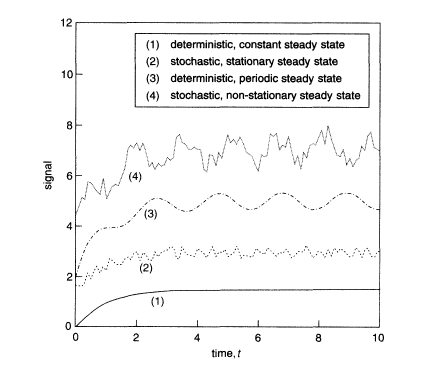
</center>

# Validation of a Model

* Validation of a stochastic model requires that the statistical characteristics of all input signals are well defined.
* These characteristics, usually the statistical mean, autocorrelation, and spectral density functions, form the basis of random models.
* Linear systems present very useful results, such as the relationship between autocorrelation and spectral density (Fourier transform):

$$S_{xx}(\omega) = \int_{-\infty}^{\infty} R_{xx}(\tau)exp(-j\omega\tau) \,d\tau$$
$$R_{xx}(\tau) = \frac{1}{2\pi}\int_{-\infty}^{\infty} S_{xx} (\omega)exp(j\omega\tau) \,d\omega$$

In a deterministic linear system, there is a relationship between the input and output spectral densities. If the input and output signals are x(t) and y(t), respectively, with their corresponding Fourier transforms X(ω) and Y(ω), then:

$$Y(\omega) = H(j\omega)X(\omega)$$
$$S_{yy}(\omega) = |H(j\omega)|^2S_{xx}(\omega)$$

where $H(s)$ is the transfer function of the system, with $s = j\omega$ and $S_{xx}(\omega)$ and $S_{yy}(\omega)$ being the input and output spectral densities.



## Example 1

Considering a linear system characterized by $\dot{y} + 2y = x$, with $y(0) = 0$, transfer function $H(s) = 1/(s + 2)$, and assuming that the input signal is white noise with variance $\sigma_x^2 = 4$ and mean $\mu_x = 0$, it can be shown analytically that $\mu_y$ = 0, $R_{xx}(\tau) = exp(-2\tau)$ and $\sigma_y^2 = R_{xx}(0) = 1$.

How could one reach the same conclusions using simulation?


<center>

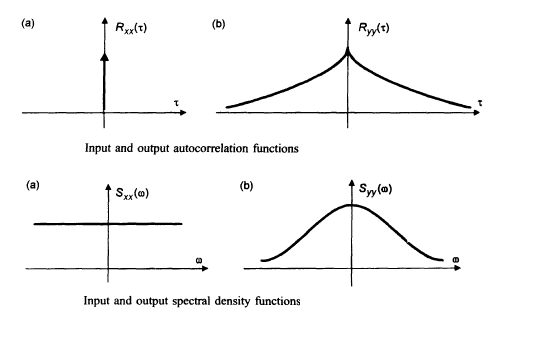
</center>


**Solution**:

For simulation, an input signal must be generated with the same determined characteristic, that is, white noise with variance $\sigma_x^2= 4$.

A first approach is to generate a uniform distribution with this statistic. Knowing that for a uniform distribution in the interval [a, b] the mean is $\mu = (a + b)/2$ and the variance is $\sigma^2 = (b – a)^2/12$, a solution would be a uniform distribution in the interval $[-2\sqrt{3},2\sqrt{3}]$:

$$x = 2\sqrt{3}(2\mathrm{RND} - 1)$$

Another possibility is to generate a Gaussian signal with variance $\sigma_x^2 = 4$, as previously shown:

$$x = 2\sqrt{-2\ln(\mathrm{RND})}\times \cos(2\pi \mathrm{RND})$$

From the definition of the system and using Euler's method, we can write: $y(t+1) = y(t) + h[x(t) – 2y(t)]$.

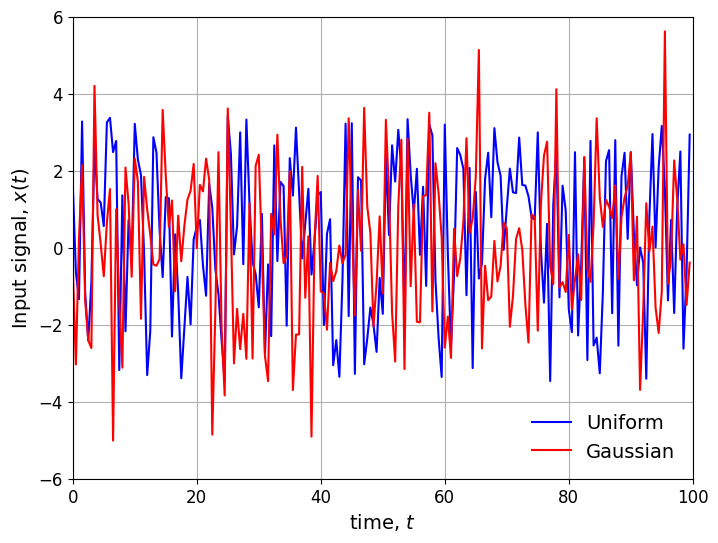

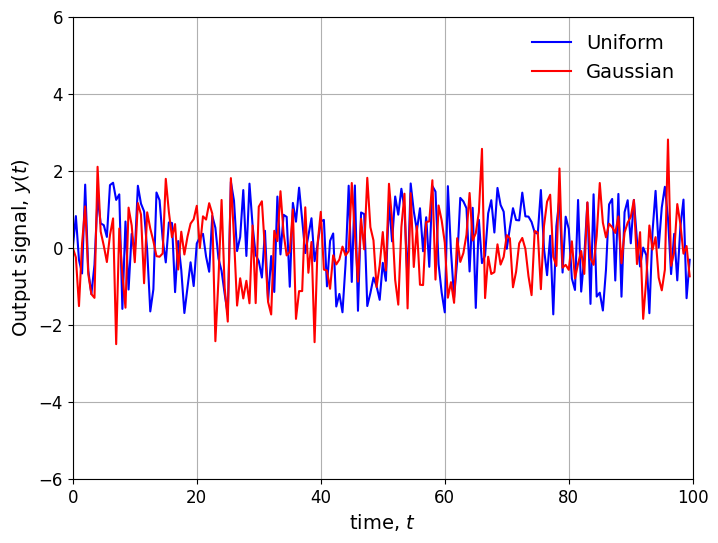

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.5; Z = 100; N = int(Z/h)

y1 = np.zeros(N); y2 = np.zeros(N)
t = np.zeros(N)
x1 = np.zeros(N); x2 = np.zeros(N)
x1[0] = 2 * np.sqrt(3) * (2 * np.random.random_sample() - 1)
x2[0] = 2 * (np.sqrt(-2 * np.log(np.random.random_sample())))\
            * np.cos(2 * np.pi * np.random.random_sample())

for i in range(1,N):
    x1[i] = 2 * np.sqrt(3) * (2 * np.random.random_sample() - 1)
    y1[i] = y1[i-1] + h * (x1[i-1] - 2 * y1[i-1])
    x2[i] = 2 * (np.sqrt(-2 * np.log(np.random.random_sample())))\
                * np.cos(2 * np.pi * np.random.random_sample())
    y2[i] = y2[i-1] + h * (x2[i-1] - 2 * y2[i-1]);
    t[i] = h*i;


# Figures
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, x1,"b-",label = "Uniform")
plt.plot(t, x2,"r-",label = "Gaussian")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"Input signal, $x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 100, -6, 6])
plt.show()

fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, y1,"b-",label = "Uniform")
plt.plot(t, y2,"r-",label = "Gaussian")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"Output signal, $y(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 100, -6, 6])
plt.show()


## Example 2

Let's obtain the Autocorrelation Functions from Example 1:

var x1: 4.3822, var x2 = 4.0712, var y1: 1.0815, var y2 = 1.0168


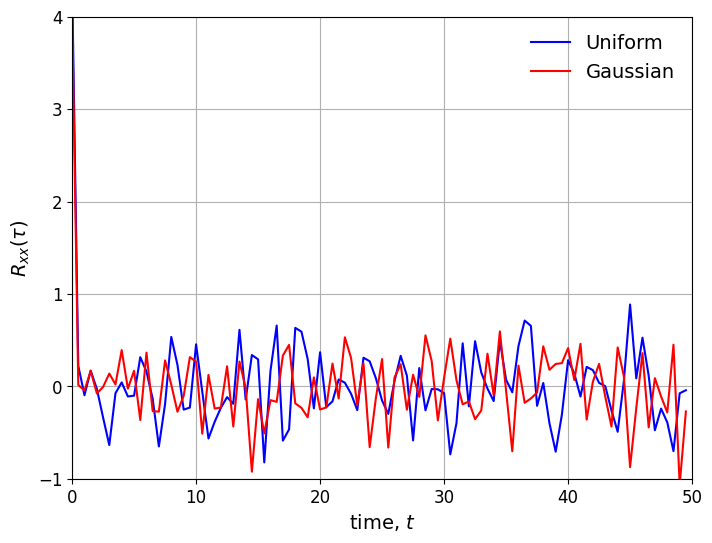

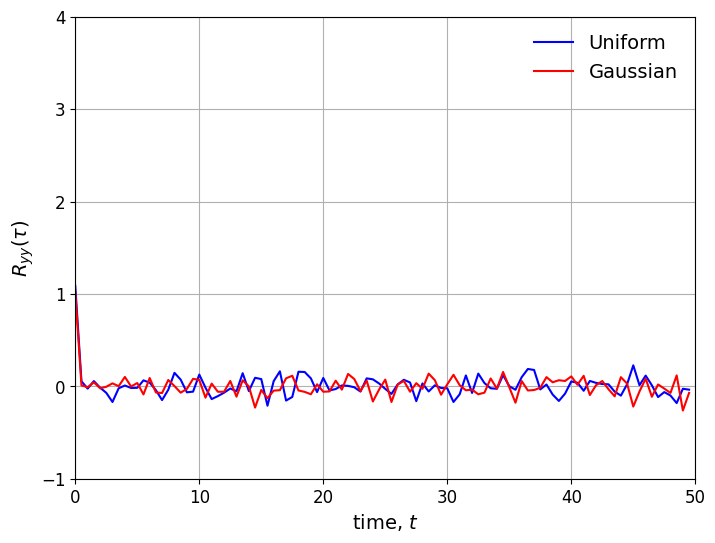

In [ ]:
upper = len(y1); upp2 = int(upper/2)
Rx1 = np.zeros(upp2); Rx2 = np.zeros(upp2)
Ry1 = np.zeros(upp2); Ry2 = np.zeros(upp2)
tau = np.zeros(upp2)

for i in range(upp2):
    Rx1[i] = np.mean(x1[0:upper-i] * x1[i:upper])
    Rx2[i] = np.mean(x2[0:upper-i] * x2[i:upper])
    Ry1[i] = np.mean(y1[0:upper-i] * y1[i:upper])
    Ry2[i] = np.mean(y2[0:upper-i] * y2[i:upper])
    tau[i] = i*h

print("var x1: %.4f, var x2 = %.4f, var y1: %.4f, var y2 = %.4f"\
      %(np.var(x1),np.var(x2),np.var(y1),np.var(y2)))

# Figures
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(tau, Rx1,"b-",label = "Uniform")
plt.plot(tau, Rx2,"r-",label = "Gaussian")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"$R_{xx}(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 50, -1, 4])
plt.grid()
plt.show()

fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(tau, Ry1,"b-",label = "Uniform")
plt.plot(tau, Ry2,"r-",label = "Gaussian")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"$R_{yy}(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 50, -1, 4])
plt.grid()
plt.show()

# Moving Average Processes

There are two reasons why random signals are used in simulations:
* The first is that there is often noise that tends to contaminate the basic process.
* The second is that not all the details about the process are usually known.

For instance, one might have a signal that depends on the most recent events of a white noise event ($w(k)$ and $w(k–1)$).

Thus, the linear model $x(k) = b_0w(k) + b_1w(k-1)$ is suggested, with $b_0$ and $b_1$ as parameters to determine. This process is generalized as a moving average (MA) process:

$$x(k) = \sum_{i=0}^qb_i w(k-i)$$

The reason they are called this is that the previous equation acts as a low-pass filter.

For instance, taking $b_0 = b_1 = b_2 = 1/3$ and $q = 2$, the signal becomes: $x(k) = 1/3 [w(k) + w(k-1) + w(k-2)]$. Thus, $x(k)$ is the average of the most recent contributions of white noise, which attenuates peaks and reduces the frequency results.

Since $x(k)$ always has some residual memory of $w(k-i)$, it is made up of multiple delta functions.

## Example 3
Consider the moving average process defined by:
$$x(k) = w(k) + 3w(k - 12) + 5w(k - 15)$$
with $\mu_w=0$ and $\sigma_w^2=1$. Find the autocorrelation of the process $x(t)$.

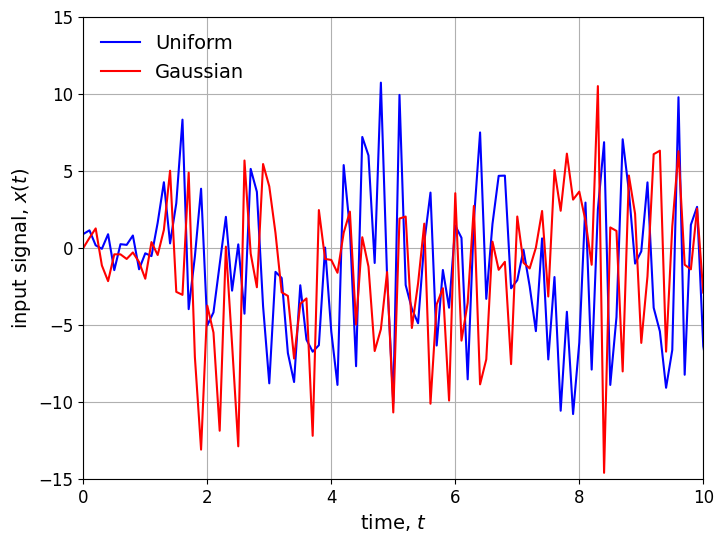

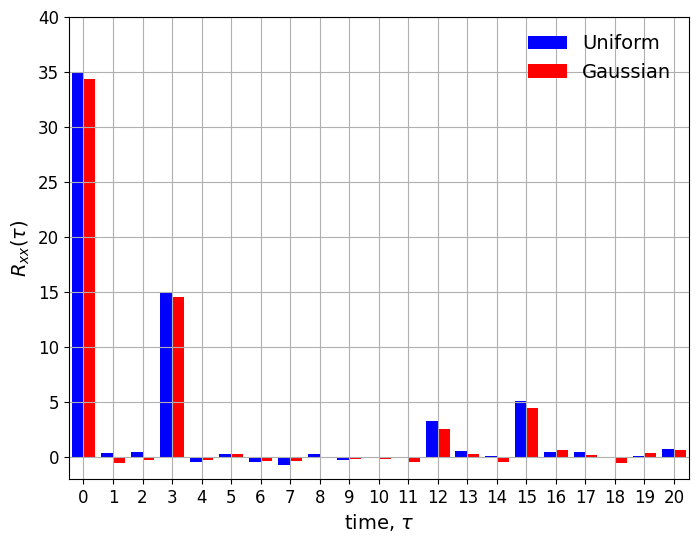

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1;
N = 1000/h;

Z = 1000; N = int(Z/h)
w1 = np.zeros(N); w2 = np.zeros(N)
x1 = np.zeros(N); x2 = np.zeros(N)
t = np.zeros(N)

for i in range(N):
    w1[i] = np.sqrt(3) * (2 * np.random.random_sample() - 1)
    w2[i] = np.sqrt(-2 * np.log(np.random.random_sample())) *\
                 np.cos(2 * np.pi * np.random.random_sample())

    if (i >= 15):
        x1[i] = w1[i] + 3 * w1[i-12] + 5 * w1[i-15]
        x2[i] = w2[i] + 3 * w2[i-12] + 5 * w2[i-15]
    elif (i > 12):
        x1[i] = w1[i] + 3 * w1[i-12]
        x2[i] = w2[i] + 3 * w2[i-12]
    else:
        x1[i] = w1[i]
        x2[i] = w2[i]
    t[i] = h * i;

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, x1,"b-",label = "Uniform")
plt.plot(t, x2,"r-",label = "Gaussian")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"input signal, $x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 10, -15, 15])
plt.show()

# Autocorrelation
def autocorrelation(data, lag):
    n = len(data)
    tau = np.arange(-lag, lag + 1)
    Rx = np.zeros(2 * lag + 1)
    data = np.asarray(data)
    for L in range(lag + 1):
        if n - L > 0:  # avoid empty slices
            Rx[lag + L] = np.mean(data[:n - L] * data[L:])
        else:
            Rx[lag + L] = 0.0
    Rx[:lag] = Rx[-1:lag:-1]
    return Rx, tau

lag = 25
Rx1, tau1 = autocorrelation(x1, lag)
Rx2, tau2 = autocorrelation(x2, lag)

bw = 0.4

# Figure
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
ax.bar(tau1 - bw/2, Rx1, color = "b", width = bw, label="Uniform")
ax.bar(tau2 + bw/2, Rx2, color = "r", width = bw, label="Gaussian")
ax.set_xticks(tau1)
ax.set_xticklabels(tau1)
ax.set_xlabel(r"time, $\tau$",fontsize=14)
ax.set_ylabel(r"$R_{xx}(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([-0.5, 20.5, -2, 40]);
plt.show()

As expected, $R_{xx}(\tau)$ has a maximum value at $\tau$ = 0 and has non-zero contributions at $\tau$ = 12 and 15, but also at $\tau$ = 3. The theoretical variance is $\sigma_x^2 = R_{xx}(0)$ = 35, which validates the simulation model.

# Autoregressive Processes

Instead of retaining memory through the input delay w(k), it can also be retained through the output delay.

This model is called autoregressive (AR) and is defined as:
$$ x(k) = w(k) - \sum_{i=0}^pa_ix(k-i)$$

Autoregressive processes not only observe the current white noise input, but also have access to previous states.

Therefore, the autocorrelation of this type of process is not trivial. * Thinking about the signal value analogously to the system state, an AR process is similar to the random walk seen previously, in which the next state (signal value) depends directly on the current state (signal value).

Indeed, an AR process is the generalization of the random walk, as it depends on any number of past signal values (not just the previous one), with white noise as input.

An AR process is also similar to an MA process, since it has a transient and post-transient region when the process is stationary.

On the other hand, unlike an MA process, an AR process can be unstable, having its post-transient region tending to infinity. This behavior causes the signal to fluctuate significantly, rendering it of little practical use in simulation.

However, when the process reaches the steady state, it is considered stationary in the broad sense, with each time slice having identical statistics.

# Autoregressive Moving Average Models
Both moving average and autoregressive processes can be combined in a single process.
In doing so, the most general of all linear processes is the so-called autoregressive moving average (ARMA) process, defined as:

$$ x(k) = -\sum_{i=0}^pa_ix(k-i) + \sum_{i=0}^qb_iw(k-i)$$

This type of process retains memory of both the white noise inputs and the signal value at specific sampling times.

Since all models are governed by white noise, modeling w(k) is very important.

## Example 4

Consider the AR signal:

$$ x(k) = w(k) + \frac{1}{2}x(k-1) +\frac{1}{3}x(k-3) 1 \frac{1}{4}x(k-4)$$

where $w(k)$ is a uniformly distributed white noise in the interval [-1,1]. Thus, white noise has variance $\sigma_w^2 = 1/3$, with autocorrelation $R_{ww}(\tau) = 1/3 \delta(\tau)$

Obtain the AR signals for three initial conditions $x(0) = 4$, $x(0) = 0$ and $x(0) = -4$.

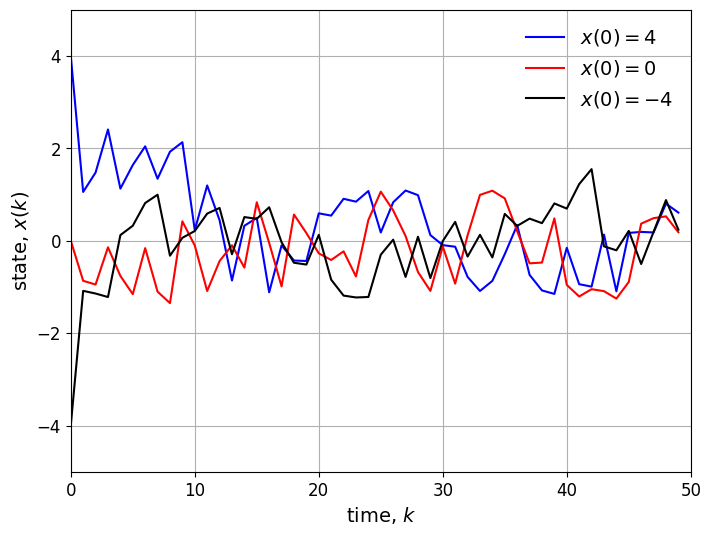

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 1; Z = 50; N = int(Z/h)
x0 = [4, 0, -4]
x = np.zeros(N)
t = np.zeros(N)
w = np.zeros(N)
X = np.zeros((3,N))

for k in range(len(x0)):
  x[0] = x0[k]
  for i in range(N):
     w[i] = 2 * np.random.random_sample() - 1
     if (i >= 4):
       x[i] = w[i] + 1/2 * x[i-1] + 1/3 * x[i-3] - 1/4 * x[i-4]
     elif (i >= 3):
       x[i] = w[i] + 1/2 * x[i-1] + 1/3 * x[i-3]
     elif (i >= 1):
       x[i] = w[i] + 1/2 * x[i-1];
     t[i] = h * i;
  X[k,:] = x

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, X[0,:],"b-",label = r"$x(0) = 4$")
plt.plot(t, X[1,:],"r-",label = r"$x(0) = 0$")
plt.plot(t, X[2,:],"k-",label = r"$x(0) = -4$")
plt.xlabel("time, $k$",fontsize=14)
plt.ylabel(r"state, $x(k)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 50, -5, 5])
plt.grid()
plt.show()

# Characteristics of Autoregressive Processes

AR processes have an important consideration that is not a restriction for MA processes.

For MA processes, the sequence always becomes stationary after the transient, regardless of the coefficients.

In AR sequences, not all sets of coefficients lead to a stationary process. If the coefficients are not chosen carefully, the process may tend to infinity.

# Stability of Autoregressive Processes
For AR processes, which are inherently linear, there is a very useful stability test:

> Autoregressive stability theorem: Let the autoregressive process x(k) be defined as $x(k) + \sum_{i=1}^p a_i x(k-i)=w(k)$. Defining the complex polynomial $C(z) = z^p + \sum_{i=1}^p a_i z^{p-i} = 0$ with $z$ being a complex number with real and imaginary parts given by $\Re(z)$ and $\Im(z)$, respectively, one can state that the process $x(k)$ is stable if and only if all the roots of $C(z)$ are confined inside a circle of unit radius. That is, if $[\Re(z)]^2 + [\Im(z)]^2 \le 1$.



## Example 5
Consider the following three AR processes:

(a) $x(k) = w(k) + x(k-1) - \frac{1}{4}x(k-2)$

(b) $x(k) = w(k) - \frac{1}{4}x(k-1) - \frac{1}{4}x(k-2) + \frac{3}{4}x(k-3)$

(c) $x(k) = w(k) + 2x(k-1) - \frac{1}{4}x(k-2) + \frac{1}{2}x(k-3)$

Analyze the stability of each of them and observe the resulting time sequence assuming zero initial states and a Gaussian noise with variance $\sigma_w^2 =1$.

**Solution**:

Looking at the characteristic polynomials:

(a) $C(z) = z^2 - z + \frac{1}{4} = 0 \implies z = \frac{1}{2}$

(b) $C(z) = z^3 + \frac{1}{4}z^2 + \frac{1}{4}z - \frac{3}{4}= 0 \implies z = \frac{3}{4}$ and $z= -\frac{1}{2}\pm j \frac{1}{2}\sqrt{3}$

(c) $C(z) = z^3 -2z^2 + \frac{1}{4}z - \frac{1}{2}= 0 \implies z = 2$ and $z= \pm j \frac{1}{2}$

And clearly, the process (c) has a root (z = 2), outside the unit circle.

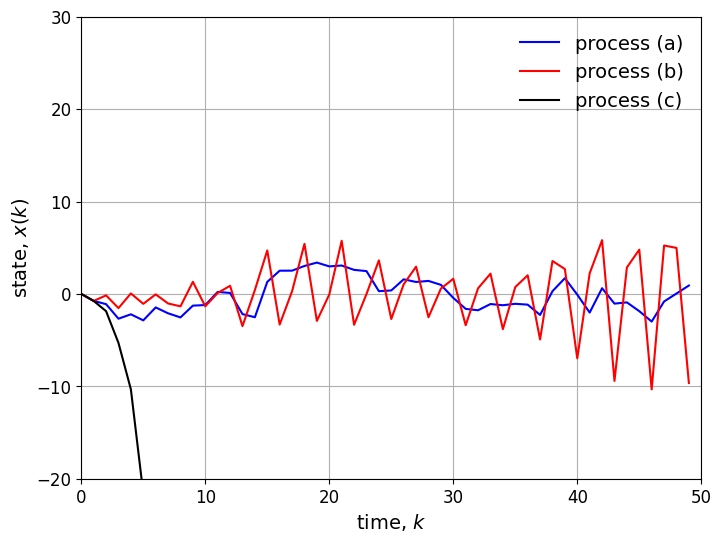

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 1; Z = 50; N = int(Z/h)
t = np.zeros(N); w = np.zeros(N)
a = np.zeros(N); b = np.zeros(N); c = np.zeros(N)

for k in range(N):
    w[k] = np.sqrt(-2 * np.log(np.random.random_sample()))\
       * np.cos(2 * np.pi * np.random.random_sample())
    if (k >= 3):
        a[k] = w[k] + a[k-1] - 1/4 * a[k-2];
        b[k] = w[k] - 1/4 * b[k-1] - 1/4 * b[k-2] + 3/4 * b[k-3];
        c[k] = w[k] + 2 * c[k-1] - 1/4 * c[k-2] + 1/2 * c[k-3];
    elif (k >= 2):
        a[k] = w[k] + a[k-1] - 1/4 * a[k-2];
        b[k] = w[k] - 1/4 * b[k-1] - 1/4 * b[k-2];
        c[k] = w[k] + 2 * c[k-1] - 1/4 * c[k-2];
    elif (k >= 1):
        a[k] = w[k] + a[k-1]
        b[k] = w[k] - 1/4 *b [k-1]
        c[k] = w[k] + 2 * c[k-1]
    t[k] = h * k


# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, a,"b-",label = "process (a)")
plt.plot(t, b,"r-",label = "process (b)")
plt.plot(t, c,"k-",label = "process (c)")
plt.xlabel("time, $k$",fontsize=14)
plt.ylabel(r"state, $x(k)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 50, -20, 30])
plt.show()

# Autocorrelation Statistics

If the process is stationary, the AR process is ergodic, and $R_{xx}(\tau)$ can be found experimentally using time averages.

However, if an analytical expression is needed, the Yule-Walker equations should be used. Thus:

$$ x(k) = w(k) - \sum_{i=0}^pa_ix(k-i)$$ $$ R_{xx}(\tau) = E[x(k)x(k-\tau)] = E[x(k)[w(k+\tau)-\sum_{i=0}^pa_ix(k+\tau +i)]]$$ $$ = R_{xx}(\tau) - \sum_{i=0}^pa_iR_{xx}(\tau -i)$$

# Cross Correlation Function

The cross correlation function Rxw(τ) can be calculated, noting that from the definition of the AR process there is no relationship between x(k) and w(k+$\tau$), unless for $\tau = 0$.

$$ x(k) = w(k) - \sum_{i=0}^pa_ix(k -i)$$

In this case, $R_{xw}(0) = E[w(k)w(k)] = \sigma_w^2$. In general:

$$ R_{xx}(\tau) + \sum_{i=0}^pa_iR_{xx}(\tau -i) = \sigma_w^2\sigma(\tau)$$

# Yule-Walker Equations

This last equation is a system of linear equations. Thus, with $\tau$ = 0, 1, 2, ..., p, one can write:
$$ \begin{aligned} \left[\begin{array}{cccc} R_{xx}(0) & R_{xx}(-1) & \cdots & R_{xx}(-p) \\ R_{xx}(1) & R_{xx}(-0) & \cdots & R_{xx}(1-p) \\ \vdots & \vdots & \ddots & \vdots \\ R_{xx}(p) & R_{xx}(p-1) & \cdots & R_{xx}(0) \\ \end{array}\right] \cdot \left[\begin{array}{c} 1 \\ a_1 \\ \vdots \\ a_p \end{array}\right]= \left[\begin{array}{c} \sigma_\mathrm{w}^2 \\ 0 \\ \vdots \\ 0 \end{array}\right] \end{aligned} $$


Since the autocorrelation function is even, there are p unknown autocorrelations instead of 2_{p–1}. Thus, if the coefficients $a_1$, $a_2$, ..., $a_p$ and the variance $\sigma_w^2$ are known, the autocorrelations $R_{xx}(.)$ are also known.

In the same way, knowledge of the autocorrelation functions leads directly to the coefficients.

## Example 6

Calculate the theoretical autocorrelation of the following AR process:

$$ x(k) = w(k) + \frac{1}{2}x(k-1) + \frac{1}{3}x(k-3) - \frac{1}{4}x(k-4)$$

where w(k) is a uniform white noise [-1, 1].

Thus: $\sigma_w^2=1/3$.

Like this,
$$ \begin{aligned} \left[\begin{array}{ccccc} R_{xx}(0) & R_{xx}(1) & R_{xx}(2) & R_{xx}(3) & R_{xx}(4) \\ R_{xx}(1) & R_{xx}(0) & R_{xx}(1) & R_{xx}(2) & R_{xx}(3) \\ R_{xx}(2) & R_{xx}(1) & R_{xx}(0) & R_{xx}(1) & R_{xx}(2) \\ R_{xx}(3) & R_{xx}(2) & R_{xx}(1) & R_{xx}(0) & R_{xx}(1) \\ R_{xx}(4) & R_{xx}(3) & R_{xx}(2) & R_{xx}(1) & R_{xx}(0) \end{array}\right] \cdot \left[\begin{array}{c} 1 \\ -1/2 \\ 0 \\ -1/3 \\ 1/4 \end{array}\right]= \left[\begin{array}{c} 1/3 \\ 0 \\ 0 \\ 0 \\ 0 \end{array}\right] \end{aligned} $$

And expanding the matrix to isolate the terms that represent the autocorrelation functions:

$$ \begin{aligned} \left[\begin{array}{ccccc} 1\times R_{xx}(0) -1/2 \times R_{xx}(1) + 0 \times R_{xx}(2) -1/2 \times R_{xx}(3) + 1/4 \times R_{xx}(4) \\ 1 \times R_{xx}(1) - 1/2 \times R_{xx}(0) + 0 \times R_{xx}(1) - 1/2 \times R_{xx}(2) + 1/4 \times R_{xx}(3) \\ 1 \times R_{xx}(2) -1/2 \times R_{xx}(1) + 0 \times R_{xx}(0) -1/2 \times R_{xx}(1) + 1/4 \times R_{xx}(2) \\ 1 \times R_{xx}(3) -1/2 \times R_{xx}(2) + 0 \times R_{xx}(1) -1/2 \times R_{xx}(0) + 1/4 \times R_{xx}(1) \\ 1 \times R_{xx}(4) -1/2 \times R_{xx}(3) + 0 \times R_{xx}(2) -1/2 \times R_{xx}(1) + 1/4 \times R_{xx}(0) \end{array}\right] = \left[\begin{array}{c} 1/3 \\ 0 \\ 0 \\ 0 \\ 0 \end{array}\right] \end{aligned} $$

And rewriting:

$$ \begin{aligned} \left[\begin{array}{ccccc} 1 & -1/2 & 0 & -1/3 & 1/4 \\ -1/2 & 1 & -1/3 & 1/4 & 0 \\ 0 & -5/6 & 5/4 & 0 & 0 \\ -1/3 & 1/4 & -1/2 & 1 & 0 \\ 1/4 & -1/3 & 0 & -1/2 & 1 \end{array}\right] \cdot \left[\begin{array}{c} R_{xx}(0) \\ R_{xx}(1) \\ R_{xx}(2) \\ R_{xx}(3) \\ R_{xx}(4) \end{array}\right]= \left[\begin{array}{c} 1/3 \\ 0 \\ 0 \\ 0 \\ 0 \end{array}\right] \end{aligned} $$


M =  [[ 1.         -0.5         0.         -0.33333333  0.25      ]
 [-0.5         1.         -0.33333333  0.25        0.        ]
 [ 0.         -0.83333333  1.25        0.          0.        ]
 [-0.33333333  0.25       -0.5         1.          0.        ]
 [ 0.25       -0.33333333  0.         -0.5         1.        ]]
var =  [[0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Rxx =  [[0.51952941]
 [0.27105882]
 [0.18070588]
 [0.19576471]
 [0.05835294]]
Rnz= [[0.27105882 0.18070588 0.19576471 0.05835294]]
Rnzf= [[0.05835294 0.19576471 0.18070588 0.27105882]]
Rxx2= [[0.05835294 0.19576471 0.18070588 0.27105882 0.51952941 0.27105882
  0.18070588 0.19576471 0.05835294]]


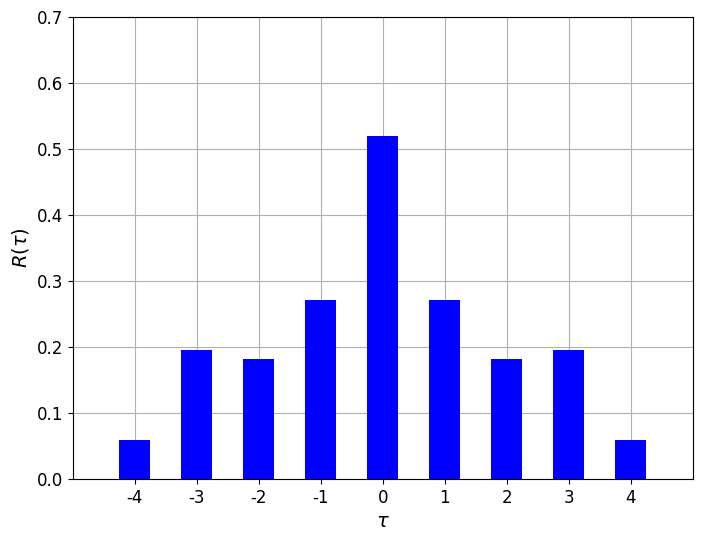

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([[1, -1/2, 0, -1/3, 1/4],[-1/2, 1, -1/3, 1/4, 0],\
 [0, -5/6, 5/4, 0, 0],[-1/3, 1/4, -1/2, 1, 0],[1/4, -1/3, 0, -1/2, 1]])
var = np.array([[1/3], [0], [0], [0], [0]])
Rxx = np.linalg.solve(M,var) # for a square matrix

print("M = ",M)
print("var = ",var)
print("Rxx = ",Rxx)
Rnz = Rxx[1:len(Rxx)].T
print("Rnz=",Rnz)
Rnzf = np.fliplr(Rnz)
print("Rnzf=",Rnzf)
Rxx2 = np.concatenate((Rnzf, Rxx.T),axis=1)
print("Rxx2=",Rxx2)
tau = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])

bw = 0.5

# Figure
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid(zorder=0)
ax.bar(tau, Rxx2[0], color = "b", width = bw, zorder=2)
ax.set_xticks(tau)
ax.set_xticklabels(tau)
ax.set_xlabel(r"$\tau$",fontsize=14)
ax.set_ylabel(r"$R(\tau)$",fontsize=14)
plt.axis([-5, 5, 0, 0.7]);
plt.show()

# Obtaining an AR model

The Yule-Walker equations are even more helpful for signal identification, which reduces the problem to finding the coefficients $a_i$ and the variance of the white noise.

It is therefore assumed that the autocorrelation functions have been obtained through a generic simulation, and we now intend to use these values to estimate a p-th order AR model. Thus, with a model with p coefficients and n+1 observations, the Yule-Walker equations become:

$$ \begin{aligned} \left[\begin{array}{cccc} R_{xx}(0) & R_{xx}(-1) & \cdots & R_{xx}(-p) \\ R_{xx}(1) & R_{xx}(-0) & \cdots & R_{xx}(1-p) \\ \vdots & \vdots & \cdots & \vdots \\ R_{xx}(p) & R_{xx}(p-1) & \cdots & R_{xx}(0) \\ \vdots & \vdots & \cdots & \vdots \\ R_{xx}(n) & R_{xx}(n-1) & \cdots & R_{xx}(n-p) \\ \end{array}\right] \cdot \left[\begin{array}{c} 1 \\ a_1 \\ \vdots \\ a_p \end{array}\right]= \left[\begin{array}{c} \sigma_\mathrm{w}^2 \\ 0 \\ \vdots \\ 0 \end{array}\right] \end{aligned} $$

And rearranging the previous linear system:

$$ \begin{aligned} \left[\begin{array}{ccccc} R_{xx}(-1) & R_{xx}(-2) & \cdots & R_{xx}(-p) & -1 \\ R_{xx}(0) & R_{xx}(-1) & \cdots & R_{xx}(p-1) & 0 \\ \vdots & \vdots & \cdots & \vdots & 0\\ R_{xx}(p-1) & R_{xx}(p-2) & \cdots & R_{xx}(0) & 0\\ \vdots & \vdots & \cdots & \vdots & 0\\ R_{xx}(n-1) & R_{xx}(n-2) & \cdots & R_{xx}(n-p) & 0\\ \end{array}\right] \cdot \left[\begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_p \\ \sigma_{\mathrm{w}}^2 \end{array}\right]= \left[\begin{array}{c} -R_{xx}(0) \\ -R_{xx}(1) \\ \vdots \\ -R_{xx}(n-1) \\ -R_{xx}(n) \end{array}\right] \end{aligned} $$

This system is of the form $R_a = \rho$, where $R$ is a matrix $(n+1)\times (p+1)$, $\rho$ is a data vector $(n+1)\times 1$, and a is the vector of unknown variables. * A solution for a can be found with $a = (R^TR)^{-1}R^T\rho$

## Example 7
Model the experimental autocorrelation data as an AR process of the form $x(k)= w(k) – a_1x(k – 1) –a_2x(k – 2)$, where $w(k)$ is white noise with unknown variance. Use the simulation results for $\tau=-5, -4, -3, \dots, 4, 5$.

<div align="center">

| $\tau$    |$R(\tau)$|
| ----------|---------- |
| $0$  | $0.527$    |
| $1$  | $0.287$    |
| $2$  | $0.198$    |
| $3$  | $0.214$    |
| $4$  | $0.092$    |
| $5$  | $0.055$    |
</div>

R =  [[ 0.287  0.198 -1.   ]
 [ 0.527  0.287  0.   ]
 [ 0.287  0.527  0.   ]
 [ 0.198  0.287  0.   ]
 [ 0.214  0.198  0.   ]
 [ 0.092  0.214  0.   ]]
rho =  [[-0.527]
 [-0.287]
 [-0.198]
 [-0.214]
 [-0.092]
 [-0.055]]
a =  [[-0.45337018]
 [-0.16508343]
 [ 0.36419624]]


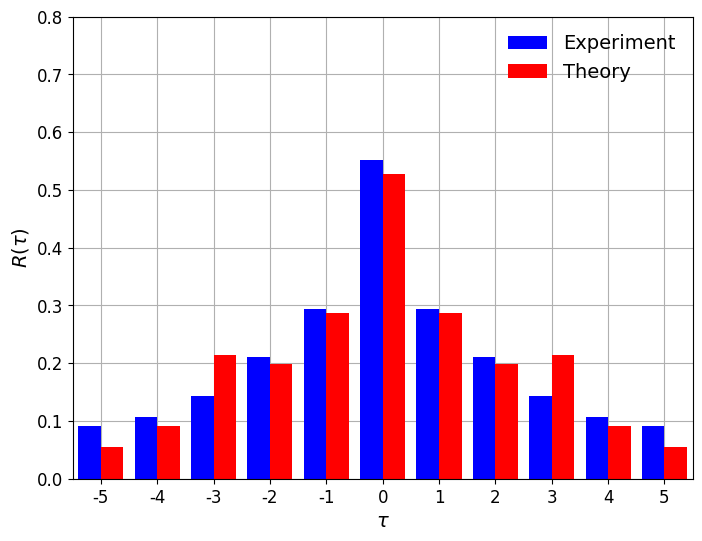

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Rxxt = np.array([0.055, 0.092, 0.214, 0.198, 0.287,\
                 0.527, 0.287, 0.198, 0.214, 0.092, 0.055])
R = np.array([[0.287, 0.198, -1],[0.527, 0.287, 0],\
                 [0.287,0.527, 0],[0.198, 0.287, 0],\
                 [0.214, 0.198, 0],[0.092, 0.214, 0]])
rho = np.array([[-0.527],[-0.287],[-0.198],[-0.214],[-0.092],[-0.055]])

print("R = ",R)
print("rho = ",rho)

# Solving the linear system
a = np.linalg.lstsq(R,rho,rcond=None)[0]

print("a = ",a)

# x[k] = w[k] + 0.4534*x[k-1] + 0.1651*x[k-2]
N = 1000
x = np.zeros(N); w = np.zeros(N)

x[0] = 1.0453*(2*np.random.random_sample() - 1)
for i in range(1,N):
  w[i] = 1.0453*(2*np.random.random_sample() - 1)
  if (i >= 2):
     x[i] = w[i] + 0.4534*x[i-1] + 0.1651*x[i-2]
  else:
     x[i] = w[i] + 0.4534*x[i-1]

# Autocorrelation
def autocorrelation(data, lag):
    n = len(data)
    tau = np.arange(-lag, lag + 1)
    Rx = np.zeros(2 * lag + 1)
    data = np.asarray(data)
    for L in range(lag + 1):
        if n - L > 0:  # avoid empty slices
            Rx[lag + L] = np.mean(data[:n - L] * data[L:])
        else:
            Rx[lag + L] = 0.0
    Rx[:lag] = Rx[-1:lag:-1]
    return Rx, tau

Theory = Rxxt
Experiment2, Ll2 = autocorrelation(x, 5)
data2 = [Experiment2, Theory]

bw = 0.4

# Figure
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid(zorder=0)
ax.bar(Ll2 - bw/2, data2[0], color = "b", width = bw, label="Experiment", zorder=2)
ax.bar(Ll2 + bw/2, data2[1], color = "r", width = bw, label="Theory", zorder=2)
ax.set_xticks(Ll2)
ax.set_xticklabels(Ll2)
ax.set_xlabel(r"$\tau$",fontsize=14)
ax.set_ylabel(r"$R(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([-5.5, 5.5, 0, 0.8]);
plt.show()

Thus, the obtained second-order AR model is: $x(k) = w(k) + (0.4534)x(k – 1) + (0.1651)x(k – 2)$, with noise variance $\sigma_w^2=0.3642$. Using uniform statistics: [-1.0453; 1.0453] $\implies$ w(k) = 1.0453(2$\times$RND+1)


# Transfer Function of Autoregressive Moving Average Processes

As seen previously, the autoregressive moving average (ARMA) process is defined as: $$ x(k) = -\sum_{i=0}^pa_ix(k-i)+\sum_{i=0}^qb_iw(k-i)$$

Equivalently, the transfer function is:
$$ H(z) = \frac{x(k)}{w(k)} = \frac{\sum_{i=0}^qb_iZ^i}{1+\sum_{i=0}^pa_iZ^i}$$

The denominator of this ratio is called the characteristic polynomial C(z) and determines the stability of the system.

If the transfer function is written as a power series, the coefficient $h(i)$ of $Z^{-i}$ is called the impulse response of the signal.

$$ H(z) = \frac{x(k)}{w(k)} = h(0) + h(1)Z^{-1}+ h(2)Z^{-2} + ...$$

## Example 8

Characterize the ARMA signal defined by the equation:

$$ x(k) = x(k-1) - \frac{1}{4}x(k-2) + w(k) + 3w(k-1) +2w(k-2)$$

from its impulse response.

<br />

**Solution**:

$$x(k)=Z^{-1}x(k)-\frac{1}{4}Z^{-2}x(k)+w(k)+3Z^{-1}w(k)+2Z^{-2}w(k)$$

The transfer function is:

$$H(Z)=\frac{x(k)}{w(k)}=\frac{1+3Z^{-1}+2Z^{-2}}{1-Z^{-1}+\frac{1}{4}Z^{-2}}=\frac{n}{d}$$

In theory, it is known that:

$$h(k)=1+\sum_{k=1}^{\infty}(1/2)^k(15k-7)$$

We can also note that:

$h(0) = 1$

$h(1) = h(0) + 3$

$h(2) = h(1) – 1/4~h(0) + 2$

Therefore for $k \ge 3$:

$$h(k) = h(k-1) – 1/4~h(k-2)$$


So a program for these calculations is given below (using ldiv function, where we need the numerator and denominator coefficients) and series expansion. In the given case, $n=[1,~3,~2]$ and $d=[1,~-1,~1/4]$.

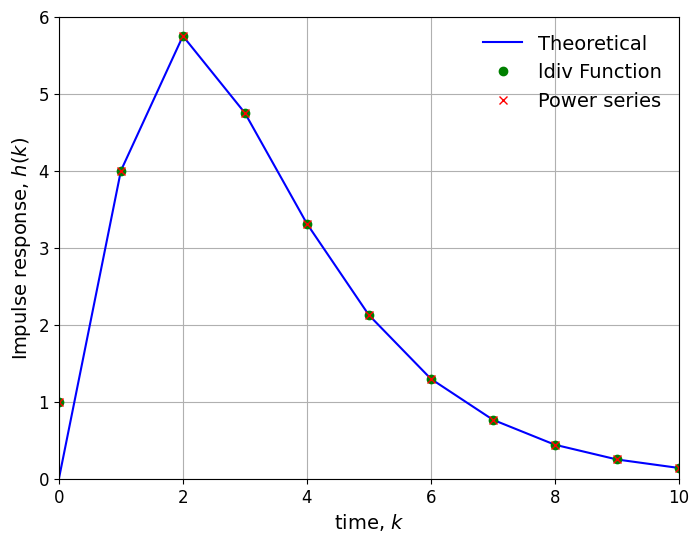

h[0] = 1.0000, h[1] = 4.0000, h[2] = 5.7500, h[3] = 4.7500, h[4] = 3.3125, h[5] = 2.1250, 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ldiv(a, b, N):
    # based in the function developed at
    # https://www.mathworks.com/matlabcentral/fileexchange/1752-calculates-inverse-z-transform-by-long-division
    funresult=[]
    if len(b) < 2:
        funresult=a / b
        for i in range(len(funresult),N):
            funresult[i]=0
        return funresult

    for i in range(len(a),N):
        a.append(0)

    for i in range(0,N):
        funresult.append(a[0]/b[0])
        if len(a) > 1:
            for k in range(1,len(b)):
                if k >= len(a):
                    a.append(0)
                a[k] = a[k] - funresult[-1]*b[k]

            for i in range(len(a)-1):
                a[i]=a[i + 1]
            a=a[:-1]
    return funresult

N = 20;
ht1 = np.zeros(N); ka = np.zeros(N)
h = np.zeros(N);
h[0] = 1;

# theoretical
for i in range(1,N):
   ht1[i] = (1/2)**i * (15*i - 7)
   ka[i] = i

# using ldiv:
a = [1,3, 2]
b = [1, -1, 1/4]
ht2 = ldiv(a,b,20)

# using series expansion:
for i in range(1,N):
  if i == 1:
    h[i] = h[i-1] + 3
  elif i == 2:
    h[i] = h[i-1] - 1/4*h[i-2] + 2
  else:
    h[i] = h[i-1] - 1/4*h[i-2]

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid(zorder=0)
plt.plot(ka, ht1,"b-",label="Theoretical")
plt.plot(ka, ht2,"go",label="ldiv Function")
plt.plot(ka, h,"rx",label="Power series")
plt.xlabel("time, $k$",fontsize=14)
plt.ylabel(r"Impulse response, $h(k)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 10, 0, 6])
plt.show()

for i in range(6):
  print("h[%d] = %.4f, "%(i,h[i]), end = "")

## Behavior of the Impulse Response

As the name implies, the impulse response is the system's response to a single unit impulse at the input.

As expected, the impulse response increases for the first few coefficients and then tends to zero as $k$ increases.

To obtain autocorrelation in an ARMA process, it is necessary to know the impulse response.

For an ARMA process, autocorrelation can be obtained by the following equations:

$$R_{xx}(\tau)=
\begin{cases}
  -\sum\limits_{i=1}^{p} a_iR_{xx}(|\tau|-i)+\sum\limits_{i=0}^{q-|\tau|}h(i)b_{i+|\tau|} & |\tau| \le q, \\    
  -\sum\limits_{i=1}^{p} a_iR_{xx}(|\tau|-i) & |\tau| > q.    
\end{cases}
$$

## Example 9

Determine the autocorrelation of the ARMA process

$$ x(k) = x(k-1) - \frac{1}{4}x(k-2) + w(k) + 3w(k-1) +2w(k-2)$$

where $w(k)$ is a white noise with variance $\sigma_w^2 = 1$ using theoretical and simulation techniques.

**Solution**:

Firstly using the ARMA general equation, $p = 2$, $q = 2$, $a_1 = -1$, $a_2 = 1/4$, $b_0 = 1$, $b_1 = 3$, and $b_2 = 2$. From the last example, $h(0) = 1$, $h(1) = 4$, and $h(2) = 5.75$.

Thus, for $\tau = 0, 1, 2$, the autocorrelation reduces to three equations:

$$R_{xx}(0) = -a_1R_{xx}(-1)-a_2R_{xx}(-2)+\sigma_w^2[h(0)b_0+h(1)b_1+h(2)b_2]=R_{xx}(1)-1/4~R_{xx}(2)+24.5$$

$$R_{xx}(1) = -a_1R_{xx}(0)-a_2R_{xx}(-1)+\sigma_w^2[h(0)b_1+h(1)b_2]=R_{xx}(0)-1/4~R_{xx}(1)+11$$

$$R_{xx}(2) = -a_1R_{xx}(1)-a_2R_{xx}(0)+\sigma_w^2h(0)b_2=R_{xx}(1)-1/4~R_{xx}(0)+2$$

And rewritting:

$$ \begin{aligned} \left[\begin{array}{ccc} 1 & -1 & 1/4 \\
-1& 5/4 & 0 \\
1/4 & -1 & 1 \\
\end{array}\right] \cdot \left[\begin{array}{c} R_{xx}(0) \\ R_{xx}(1) \\ R_{xx}(2) \end{array}\right]= \left[\begin{array}{c} 24.5 \\ 11 \\ 2 \end{array}\right] \end{aligned} $$

Solving the linear system:

$$R_{xx}(0) = 272/3, R_{xx}(1) = 244/3, R_{xx}(2) = 182/3$$

If $\tau>2$, we can use the recursive formula $R_{xx}(\tau) = R{xx}(\tau-1)-1/4R_{xx}(\tau-2)$, which leads to $R_{xx}(3) = R_{xx}(2)-1/4~R_{xx}(1)=141/3$, $R_{xx}(4) = R_{xx}(3)-1/4~R_{xx}(2)=151/6$ and so on.

Using simulation:

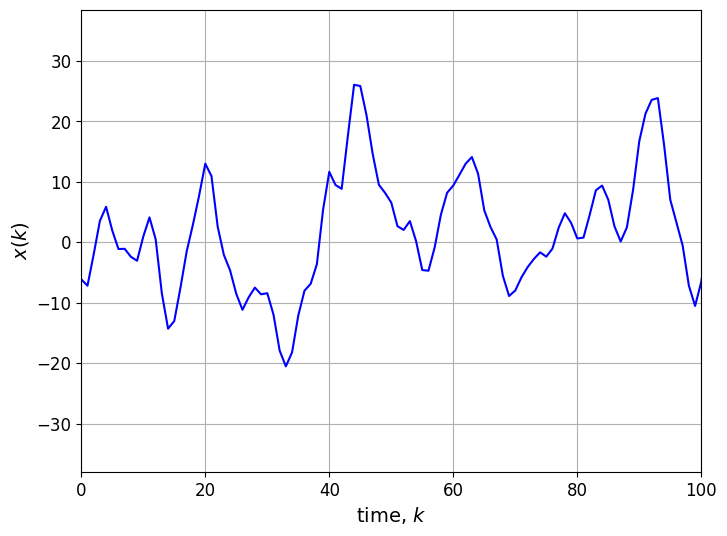

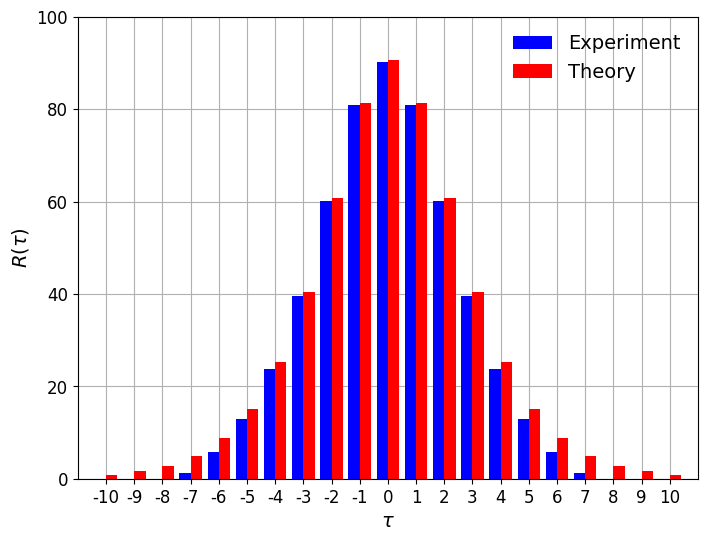

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R = np.array([[1, -1, 1/4],[-1, 5/4, 0],[1/4, -1, 1]])
rho = np.array([[24.5],[11],[2]])

# Solving the linear system
Rxx = np.linalg.solve(R,rho) # for square matrix

taumax = 10
# Theoretical solution
Rxxt = [272/3, 244/3, 182/3]
for i in range(3,taumax+1):
  Rxxt.append(Rxxt[i-1]-1/4*Rxxt[i-2])
Rxt = np.zeros(2 * taumax + 1)
Rxt[taumax:] = Rxxt
Rxt[:taumax] = Rxt[-1:taumax:-1]

# Simulation solution
N = 10000
w = np.zeros(N); x = np.zeros(N); ka = np.zeros(N)
w_2 = np.sqrt(-2*np.log(np.random.random_sample()))\
        * np.cos(2*np.pi*np.random.random_sample())
w_1 = np.sqrt(-2*np.log(np.random.random_sample()))\
        * np.cos(2*np.pi*np.random.random_sample())

for i in range(N):
    w[i] = np.sqrt(-2*np.log(np.random.random_sample()))\
          * np.cos(2*np.pi*np.random.random_sample())
    if (i >= 2):
        x[i] = x[i-1]-1/4*x[i-2]+w[i]+3*w[i-1]+2*w[i-2]
    elif (i == 1):
        x[i] = x[i-1]+w[i]+3*w[i-1]+2*w_1
    elif (i == 0):
        x[i] = w[i] + 3*w_1 + 2*w_2
    ka[i] = i

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(ka, x,"b-")
plt.xlabel("time, $k$",fontsize=14)
plt.ylabel(r"$x(k)$",fontsize=14)
plt.xlim([0,100])
plt.show()

# Autocorrelation
def autocorrelation(data, lag):
    n = len(data)
    tau = np.arange(-lag, lag + 1)
    Rx = np.zeros(2 * lag + 1)
    data = np.asarray(data)
    for L in range(lag + 1):
        if n - L > 0:  # avoid empty slices
            Rx[lag + L] = np.mean(data[:n - L] * data[L:])
        else:
            Rx[lag + L] = 0.0
    Rx[:lag] = Rx[-1:lag:-1]
    return Rx, tau

Experiment, L = autocorrelation(x, 10)
data2 = [Experiment, Rxt]
bw = 0.4

# Figure
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid(zorder=0)
ax.bar(L - bw/2, data2[0], color = "b", width = bw, label="Experiment", zorder=2)
ax.bar(L + bw/2, data2[1], color = "r", width = bw, label="Theory", zorder=2)
ax.set_xticks(L)
ax.set_xticklabels(L)
ax.set_xlabel(r"$\tau$",fontsize=14)
ax.set_ylabel(r"$R(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([-11, 11, 0, 100]);
plt.show()

## Additive Noise

There are two reasons why studying noise statistics is so important.

The first is that in signal modeling, it's rarely sufficient to consider the ideal case, due to the fluctuations introduced by real systems; hence, this type of model is called additive noise and follows the principle of superposition.

<cemter>

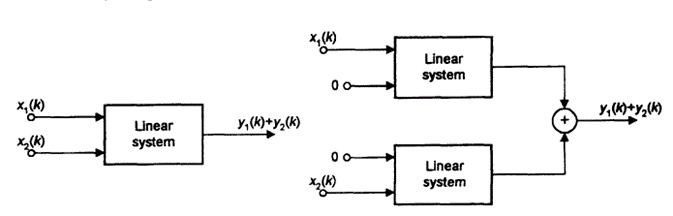
</center>

The second reason is that although any noise may have a seemingly common influence on the system, the statistics can be quite different, affecting the outputs in different ways.

For example, let's take a climatological model that shows the variation in maximum daily temperature (in Farehnheight) over more than one year, as shown below. To find a suitable model, one must first determine the ideal signal and then characterize the noise.

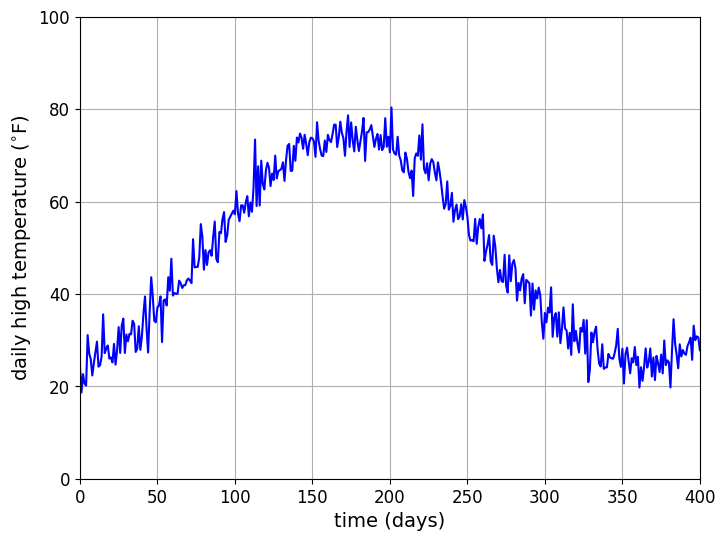

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Experimental data
dailyTemp = [33.131, 31.842, 26.223, 30.995, 33.681, 28.089, 25.471, 24.120, 34.279, 31.255, 25.593, 28.256, 28.967, 24.567, 26.085,
29.384, 26.890, 28.190, 30.985, 22.712, 23.061, 27.191, 24.450, 31.454, 22.021, 27.357, 25.368, 24.815, 27.499, 23.567,
26.699, 23.065, 27.267, 21.895, 27.317, 25.261, 26.754, 27.108, 19.020, 29.021, 27.600, 29.128, 20.921, 26.110, 28.936,
25.366, 25.504, 21.992, 28.254, 25.398, 24.512, 18.660, 22.638, 20.590, 20.165, 31.084, 27.082, 25.882, 22.357, 25.034,
27.394, 29.667, 24.248, 24.569, 26.431, 35.579, 27.181, 28.185, 28.848, 26.003, 26.254, 25.168, 29.172, 24.699, 27.850,
32.823, 27.235, 33.180, 34.655, 27.230, 31.219, 29.745, 31.373, 31.242, 34.197, 33.519, 27.432, 28.173, 33.003, 27.893,
30.846, 35.742, 39.439, 32.569, 27.313, 36.044, 43.604, 39.544, 34.141, 33.867, 37.061, 37.527, 39.449, 29.580, 38.594,
38.815, 37.499, 43.621, 40.681, 47.610, 39.639, 40.193, 40.040, 40.013, 42.862, 42.354, 41.294, 41.863, 41.917, 42.914,
43.336, 42.907, 42.330, 51.847, 45.743, 45.841, 45.823, 47.859, 55.113, 52.415, 45.245, 49.497, 46.268, 48.971, 49.466,
48.244, 52.391, 55.664, 47.590, 46.872, 53.417, 53.132, 56.154, 57.715, 51.258, 52.627, 56.052, 56.738, 57.372, 58.020,
57.245, 62.259, 57.420, 55.732, 59.167, 59.163, 57.570, 59.787, 61.163, 56.802, 59.798, 57.784, 62.806, 73.410, 59.033,
67.626, 59.135, 68.844, 63.718, 62.616, 66.712, 68.386, 67.300, 63.349, 66.055, 64.669, 69.951, 65.021, 66.546, 66.819,
67.063, 68.473, 64.459, 68.992, 72.079, 72.464, 66.632, 66.655, 72.049, 68.800, 73.853, 72.782, 74.716, 73.817, 71.421,
74.433, 72.432, 70.035, 72.837, 73.819, 73.709, 73.042, 69.666, 77.155, 73.159, 71.279, 69.930, 69.839, 73.203, 70.732,
74.435, 73.280, 72.874, 74.575, 76.634, 76.645, 71.790, 73.952, 77.284, 74.852, 73.713, 69.897, 75.000, 78.655, 71.812,
77.121, 73.211, 70.852, 76.186, 73.322, 70.938, 73.061, 75.141, 78.096, 68.788, 74.979, 75.019, 75.589, 76.531, 74.141,
71.821, 73.588, 74.622, 71.259, 74.385, 71.131, 71.823, 78.043, 71.858, 74.007, 70.637, 80.366, 71.250, 70.403, 70.131,
74.015, 69.951, 68.915, 66.726, 66.323, 70.593, 69.219, 66.411, 65.052, 66.691, 61.201, 69.340, 70.412, 69.910, 74.304,
69.062, 76.710, 67.096, 66.105, 68.297, 64.587, 68.195, 69.166, 68.513, 66.326, 64.587, 68.464, 66.596, 64.110, 61.068,
58.449, 59.471, 64.356, 58.237, 59.089, 61.886, 55.637, 58.147, 59.330, 56.188, 56.763, 59.402, 56.115, 60.311, 58.841,
56.697, 52.754, 51.524, 51.676, 51.392, 56.229, 50.850, 54.540, 56.219, 54.199, 57.205, 47.155, 49.195, 50.650, 52.728,
47.110, 46.265, 52.613, 50.266, 45.595, 42.525, 45.194, 42.780, 42.591, 48.448, 41.739, 40.300, 48.362, 42.748, 46.521,
47.333, 45.569, 38.547, 42.379, 40.762, 43.312, 44.282, 37.971, 43.046, 42.658, 42.304, 35.309, 42.249, 36.591, 40.759,
39.010, 41.385, 39.738, 33.871, 30.299, 35.879, 33.847, 37.033, 35.976, 41.424, 30.719, 34.877, 35.845, 30.748, 36.018,
29.359, 32.477, 37.080, 32.508, 32.093, 28.189, 31.594, 26.805, 37.756, 29.756, 31.986, 29.377, 27.330, 32.652, 31.833,
34.379, 27.074, 34.309, 20.929, 23.564, 31.633, 29.540, 31.684, 32.908, 27.969, 24.897, 24.296, 29.112, 23.774, 24.091,
24.101, 27.011, 26.255, 26.064, 25.972, 27.188, 28.886, 32.439, 26.102, 24.207, 28.151, 20.608, 27.001, 28.386, 25.464,
22.815, 26.066, 25.184, 28.514, 24.601, 26.383, 19.753, 24.135, 21.189, 24.244, 28.208, 24.049, 25.270, 28.190, 22.124,
26.245, 21.362, 26.584, 24.996, 23.088, 26.884, 22.784, 29.914, 24.596, 25.614, 25.210, 19.757, 27.704, 34.525, 29.277,
26.815, 23.905, 29.089, 26.452, 27.858, 27.064, 26.819, 28.731, 29.507, 30.531, 25.733, 33.133, 29.992, 30.830, 30.566,
27.759, 30.249, 33.894, 35.000, 31.189, 30.553, 28.441, 37.552, 32.109, 34.656, 29.024, 37.609, 37.207, 36.244, 37.920,
37.863, 40.329, 36.144, 36.753, 43.666, 38.646, 36.380, 35.228, 38.591, 39.334, 38.353, 36.060, 38.080, 43.837, 42.797,
41.924, 46.877, 44.033, 45.165, 46.322, 50.338, 46.185, 48.099, 46.739, 46.830, 43.688, 47.879, 45.816, 49.389, 44.855,
50.662, 51.317, 52.479, 54.087, 50.980, 56.414, 52.313, 48.725, 53.077, 46.164, 51.478, 58.289, 56.108, 62.950, 54.476,
48.946, 57.311, 54.973, 57.192, 56.782, 58.892, 54.325, 57.652, 59.453, 56.621, 53.932, 55.691, 66.391, 63.783, 60.356,
60.970, 61.383, 58.866, 63.737, 61.739, 67.239, 64.877, 64.457, 60.600, 65.078, 64.720, 60.985, 69.888, 66.944, 70.182,
67.868, 69.184, 62.329, 65.086, 67.405, 65.227, 74.002, 69.179, 68.826, 71.501, 73.567]
t = np.linspace(-50,500,551)

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, dailyTemp,"b-")
plt.xlabel("time (days)",fontsize=14)
plt.ylabel(r"daily high temperature ($^{\circ}$F)",fontsize=14)
plt.axis([0, 400, 0, 100]);
plt.show()

An ideal model representing temperature variation can be obtained from the realization that the signal should be periodic every 365 days. Thus:

$$x_{\mathrm{ideal}}(k) = A + B \cos(\omega t + \theta)$$

where $\omega = \frac{2\pi}{365} \approx 0.017$ rad.

To achieve this goal, we will first try to eliminate the noisiest part with a moving average (MA) process, which approximates the temperature value of a day to the average of the temperatures between the n days before and the n days after. For example, $\mathrm{MA}(5)$ will be the average of the temperatures between the two days before and the two days after. Mathematically:

$$x5(k) = 1/5[x(k-2) + x(k-1) + x(k) + x(k+1) + x(k+2)]$$

The scripit below performs some atempts to fit the data using MA.

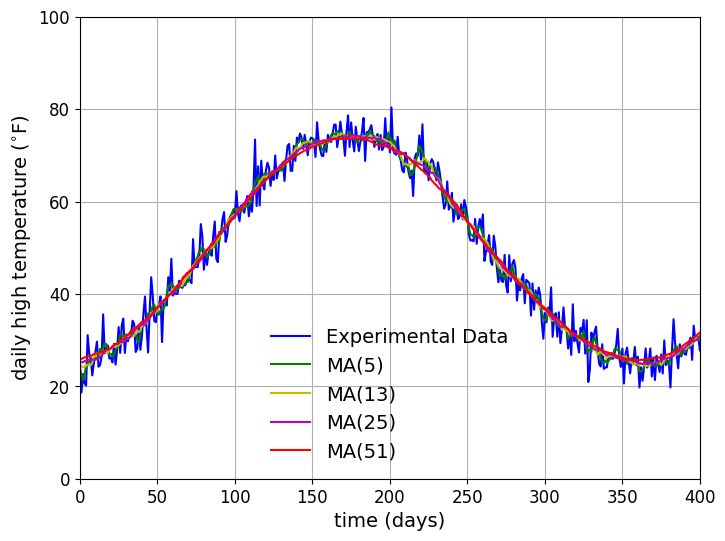

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def movingAverage(data, n):
  # it is expected that n is an odd number
  newData = [0 for _ in range(len(data))]
  lmit = int((n-1)/2)
  for i in range(lmit,len(data)-lmit):
      nd = 1/float(n)
      dSum = 0
      for j in range(i-lmit,i+lmit+1):
          dSum += data[j]
      newData[i] = nd*dSum
  return newData

t = np.linspace(-50,500,551)

x5 = movingAverage(dailyTemp,5)
x13 = movingAverage(dailyTemp,13)
x25 = movingAverage(dailyTemp,25)
x51 = movingAverage(dailyTemp,51)

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, dailyTemp,"b-",label="Experimental Data")
plt.plot(t, x5,"g-",label="MA(5)")
plt.plot(t, x13,"y-",label="MA(13)")
plt.plot(t, x25,"m-",label="MA(25)")
plt.plot(t, x51,"r-",label="MA(51)")
plt.xlabel("time (days)",fontsize=14)
plt.ylabel(r"daily high temperature ($^{\circ}$F)",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 400, 0, 100]);
plt.show()

Using MA(51), the values ​​of $A$, $B$ and $\theta$ can be obtained, using the times in which the data "filtered" by the moving average are maximum and minimum ($k_{max}$ and $k_{min}$), as well as the maximum and minimum values ​​($\mathrm{MA}_{max}$ and $\mathrm{MA}_{min}$).

$$A=\frac{1}{2}[\mathrm{MA}_{max}+\mathrm{MA}_{min}]$$

$$B=\frac{1}{2}[\mathrm{MA}_{max}-\mathrm{MA}_{min}]$$

$$\theta = -\frac{2\pi}{365}k_{max}$$

The following script calculates $A$, $B$ and $\theta$ according to the data.

MAmax = 73.7239, MAmin = 25.5313, kmax = 176.0000
A = 49.6276, B = 24.0963, θ = -3.0297


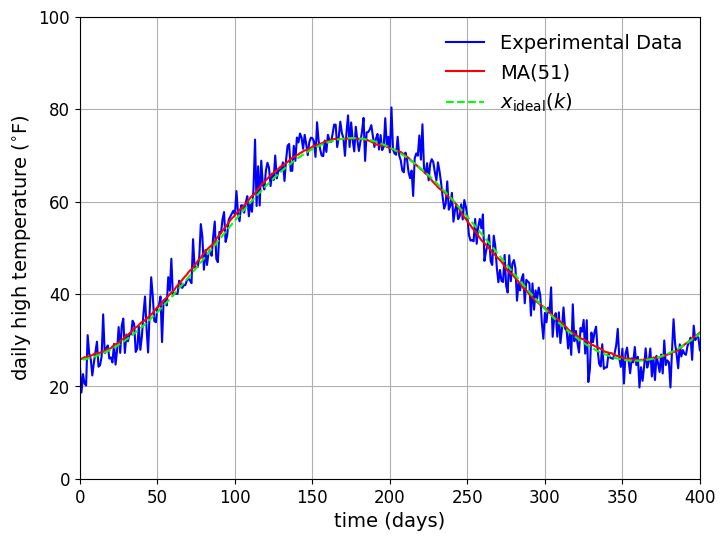

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def minmaxIgnoringZeros(data, time):
  min = float('inf')
  max = float('-inf')
  for i in range(len(data)):
    if data[i] != 0:
      if data[i] < min:
        min = data[i]
        indexmin = time[i]
      if data[i] > max:
        max = data[i]
        indexmax = time[i]
  return min, indexmin, max, indexmax

vmin, kmin, vmax, kmax = minmaxIgnoringZeros(x51, t)
A = 0.5*(vmax+vmin)
B = 0.5*(vmax-vmin)
Theta = -2/365*np.pi*kmax

# Using the model:
x1 = A + B*np.cos(2*np.pi/365*t + Theta)

print(r"MAmax = %.4f, MAmin = %.4f, kmax = %.4f"%(vmax, vmin, kmax))
print(r"A = %.4f, B = %.4f, θ = %.4f"%(A, B, Theta))
# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, dailyTemp,"b-",label="Experimental Data")
plt.plot(t, x51,"r-",label="MA(51)")
plt.plot(t, x1,"--", color="lime",label=r"$x_{\mathrm{ideal}}(k)$")
plt.xlabel("time (days)",fontsize=14)
plt.ylabel(r"daily high temperature ($^{\circ}$F)",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 400, 0, 100]);
plt.show()

As can be seen, using a 51-term MA, the curve is quite smooth and fits well. Using this value, we obtained $k_{max}= 176$, $\mathrm{MA}_{max}= 73.72$, and $\mathrm{MA}_{min} = 25.53$, which leads to $A = 49.63$, $B = 24.1$, and $\theta = -3.03$. Thus:

$$x_{\mathrm{ideal}}(k)=49.63+24.10\cos(\frac{2\pi}{365}k-3.03)$$

## Example 10

Use the achieved ideal model $x_{\mathrm{ideal}}(k)$ and calculate the residual noise by doing $x(k) - x_{\mathrm{ideal}}(k)$ for the experimental data. Test the statistical adequacy against the experimental data of high daily temperatures.

**Solution**:

The following script isolates the residual noise and calculates the basic statistics as mean, standard deviation and variance.

The script also plots the histogram of the distribution of the residual noise, that looks like a Gaussian distribution and the mean is close to zero. Therefore, with a standard deviation of $\sigma = 3.1426$, a model for the noise could be:

$$n(k) = 3.1426 \sqrt{-2\ln({\mathrm{RND})}}\cos(2\pi \mathrm{RND})$$



Mean = 0.3157, Standard deviation = 3.1426, Variance = 9.8760


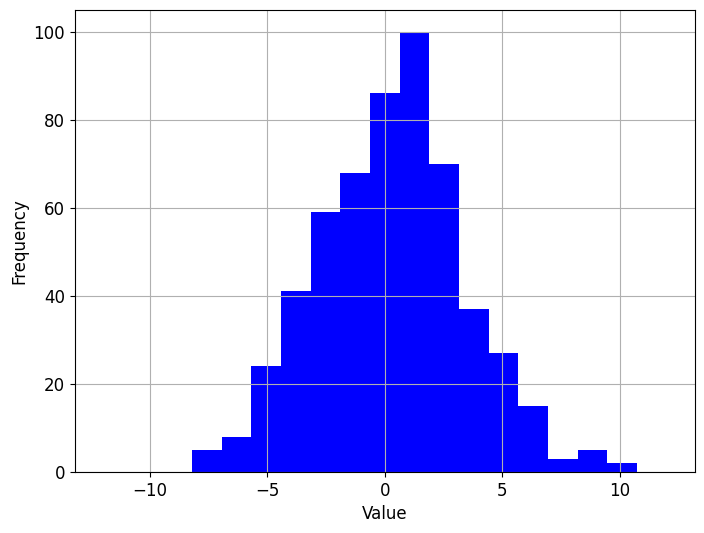

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

residual_noise = dailyTemp - x1

resN_m = np.mean(residual_noise)
resN_std = np.std(residual_noise)
resN_var = np.var(residual_noise)

print("Mean = %.4f, Standard deviation = %.4f, Variance = %.4f"%(resN_m, resN_std, resN_var))

bin_edges = np.linspace(-12, 12, 20) # 20 edges for 19 bins

fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.hist(residual_noise, bins=bin_edges, color="b")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Therefore, the final step is to generate a new noise signal $n(k)$ using the achieved model, add it to our achieved ideal signal $x_{\mathrm{ideal}}(k)$, and compare the result with the experimental data.

The following script performs this task. As can be seen, the final model closely resembles the experimental data, and the autocorrelation data are very similar to each other for $\tau = 0$, but differ for different values of $\tau$. However, these values are not significant compared to $\tau = 0$.

If this is a problem, we can use the Yule-Walker equation to refine our noise model.

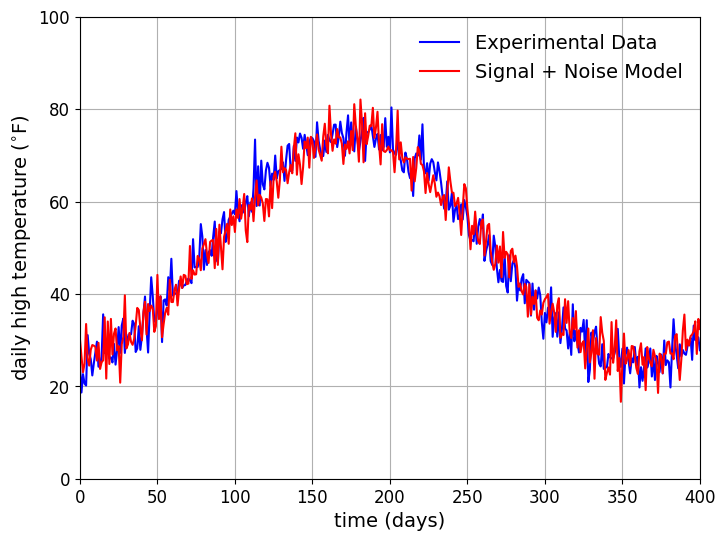

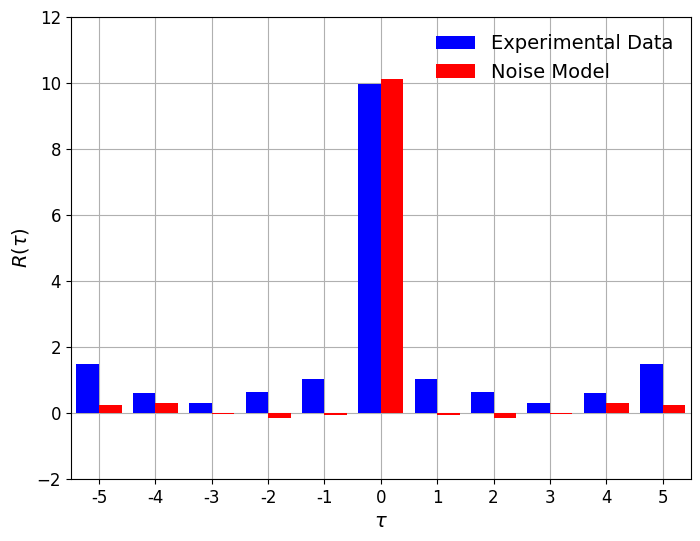

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sig_noise = np.zeros(len(t))
n = np.zeros(len(t))

t = np.linspace(-50,500,551)
for i in range(len(t)):
  ni = resN_std*np.sqrt(-2*np.log(np.random.random_sample()))\
        * np.cos(2*np.pi*np.random.random_sample())
  n[i]=ni
  sig_noise[i]=x1[i]+ni


# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, dailyTemp,"b-",label="Experimental Data")
plt.plot(t, sig_noise,"r-",label="Signal + Noise Model")
plt.xlabel("time (days)",fontsize=14)
plt.ylabel(r"daily high temperature ($^{\circ}$F)",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 400, 0, 100]);
plt.show()

# Autocorrelation
def autocorrelation(data, lag):
    n = len(data)
    tau = np.arange(-lag, lag + 1)
    Rx = np.zeros(2 * lag + 1)
    data = np.asarray(data)
    for L in range(lag + 1):
        if n - L > 0:  # avoid empty slices
            Rx[lag + L] = np.mean(data[:n - L] * data[L:])
        else:
            Rx[lag + L] = 0.0
    Rx[:lag] = Rx[-1:lag:-1]
    return Rx, tau

Rxe, ke = autocorrelation(residual_noise,5)
Rxm, km = autocorrelation(n,5)
bw = 0.4

# Figure
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid(zorder=0)
ax.bar(ke - bw/2, Rxe, color = "b", width = bw, label="Experimental Data", zorder=2)
ax.bar(km + bw/2, Rxm, color = "r", width = bw, label="Noise Model", zorder=2)
ax.set_xticks(ke)
ax.set_xticklabels(ke)
ax.set_xlabel(r"$\tau$",fontsize=14)
ax.set_ylabel(r"$R(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([-5.5, 5.5, -2, 12]);
plt.show()

## Example 11

Use the Yule-Walker equation to refine the noise model, considering $0 \le \tau \le 5$ and the autocorrelation values from the experimental data.

**Solution**:

Using the script below, the value of the autocorrelation function from the residual noise of experimental data is used to calculate the coefficients of an ARMA process. The new noise model is:

$$n(k) = 3.1038 \sqrt{-2\ln({\mathrm{RND})}}\cos(2\pi \mathrm{RND}) + 0.0874~n(k-1)+0.0472~n(k-2) + 0.0053~n(k-3) + 0.0400~n(k-4) +0.1355~n(k-5)$$

As can be seen, the achieved result is closer to the results from the data experiment.



R =  [[ 1.0154117   0.62901987  0.28199442  0.59646758  1.46145164 -1.        ]
 [ 9.97569064  1.0154117   0.62901987  0.28199442  0.59646758  0.        ]
 [ 1.0154117   9.97569064  1.0154117   0.62901987  0.28199442  0.        ]
 [ 0.62901987  1.0154117   9.97569064  1.0154117   0.62901987  0.        ]
 [ 0.28199442  0.62901987  1.0154117   9.97569064  1.0154117   0.        ]
 [ 0.59646758  0.28199442  0.62901987  1.0154117   9.97569064  0.        ]]
rho =  [[-9.97569064]
 [-1.0154117 ]
 [-0.62901987]
 [-0.28199442]
 [-0.59646758]
 [-1.46145164]]
a =  [[-8.74073789e-02]
 [-4.72622233e-02]
 [-5.32807639e-03]
 [-4.00032638e-02]
 [-1.35531171e-01]
 [ 9.63377190e+00]]


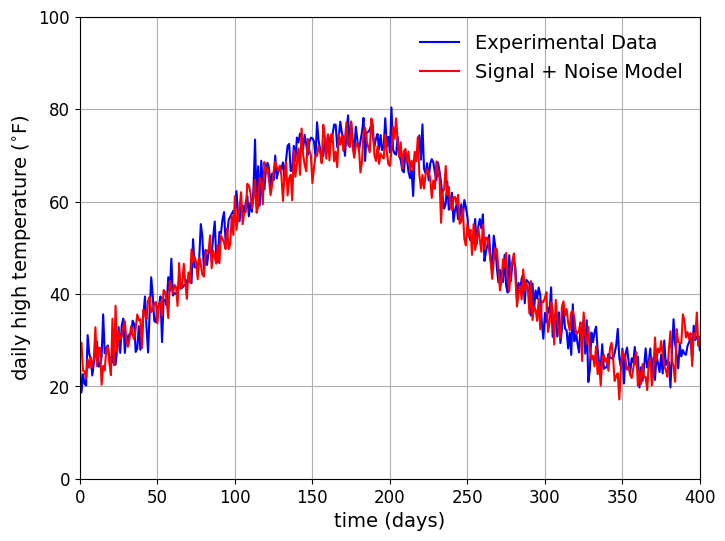

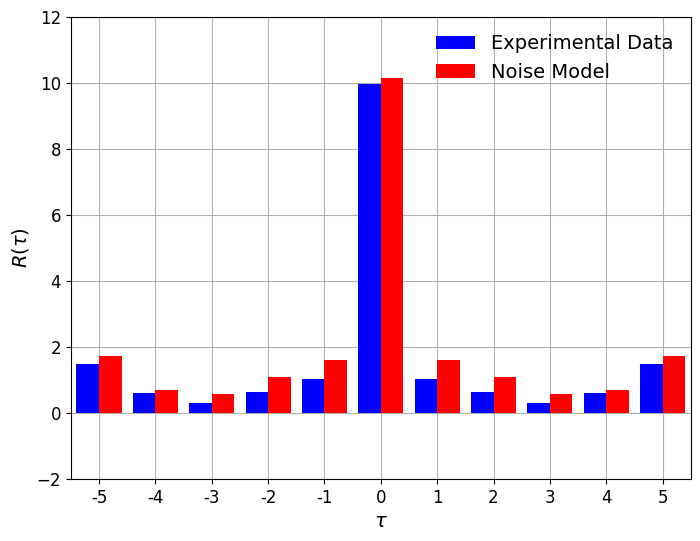

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Rxt = Rxe[5:]

R = np.array([[Rxt[1], Rxt[2], Rxt[3],Rxt[4], Rxt[5], -1],\
              [Rxt[0], Rxt[1], Rxt[2],Rxt[3], Rxt[4], 0],\
              [Rxt[1], Rxt[0], Rxt[1],Rxt[2], Rxt[3], 0],\
              [Rxt[2], Rxt[1], Rxt[0],Rxt[1], Rxt[2], 0],
              [Rxt[3], Rxt[2], Rxt[1],Rxt[0], Rxt[1], 0],
              [Rxt[4], Rxt[3], Rxt[2],Rxt[1], Rxt[0], 0]])

rho = np.array([[-Rxt[0]],[-Rxt[1]],[-Rxt[2]],[-Rxt[3]],[-Rxt[4]],[-Rxt[5]]])

a = np.linalg.lstsq(R,rho,rcond=None)[0]

print("R = ",R)
print("rho = ",rho)
print("a = ", a)

# New Noise Model
sig_noise2 = np.zeros(len(t))
noise2 = np.zeros(len(t))

# Re-calculate x1 to ensure it has the correct size
x1 = A + B*np.cos(2*np.pi/365*t + Theta)

t = np.linspace(-50,500,551)
for i in range(5,len(t)):
  ni = np.sqrt(a[5][0])*np.sqrt(-2*np.log(np.random.random_sample()))\
        * np.cos(2*np.pi*np.random.random_sample()) - a[0][0]*noise2[i-1]\
        - a[1][0]*noise2[i-2] - a[2][0]*noise2[i-3] - a[3][0]*noise2[i-4]\
        - a[4][0]*noise2[i-5]
  noise2[i]=ni
  sig_noise2[i]=x1[i]+noise2[i]


# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid()
plt.plot(t, dailyTemp,"b-",label="Experimental Data")
plt.plot(t, sig_noise2,"r-",label="Signal + Noise Model")
plt.xlabel("time (days)",fontsize=14)
plt.ylabel(r"daily high temperature ($^{\circ}$F)",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 400, 0, 100]);
plt.show()

Rxe, ke = autocorrelation(residual_noise,5)
Rxm, km = autocorrelation(noise2,5)

bw = 0.4
# Figure
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.grid(zorder=0)
ax.bar(ke - bw/2, Rxe, color = "b", width = bw, label="Experimental Data", zorder=2)
ax.bar(km + bw/2, Rxm, color = "r", width = bw, label="Noise Model", zorder=2)
ax.set_xticks(ke)
ax.set_xticklabels(ke)
ax.set_xlabel(r"$\tau$",fontsize=14)
ax.set_ylabel(r"$R(\tau)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([-5.5, 5.5, -2, 12]);
plt.show()


# Exercise
1. Consider a continuous linear system with transfer function
$$ H(s) = \frac{2}{s^2 + 4s + 3} $$
and input white noise with variance $σ_x^2 = 5$.

a) Calculate the spectral density of the output $S_{yy}(ω)$.
b) Calculate the autocorrelation of the output $R_{yy}(τ)$.
c) Simulate the results in the interval $[0, 10]$, with $h = 0{,}1$.


# References
[1] SEVERANCE, F. L., System Modeling and Simulation, John Wiley & Sons, 2001. (Some figures shown in this lecture were taken from this reference)